In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import io
import mplfinance as fplt
from PIL import Image, ImageOps

[*********************100%***********************]  1 of 1 completed


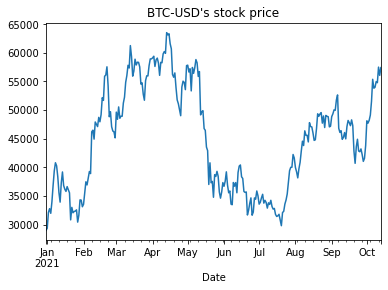

In [5]:
TICKER = "BTC-USD"

df = yf.download(TICKER, 
                 start="2021-01-01", 
                 end="2021-10-14")

df["Close"].plot(title=f"{TICKER}'s stock price");

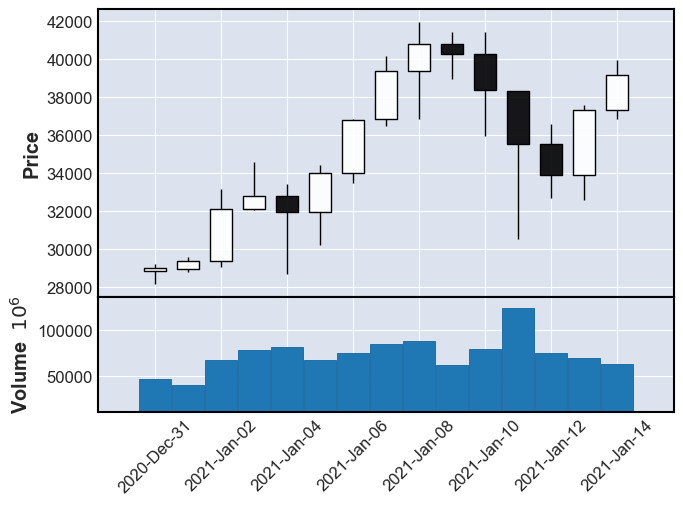

In [8]:
# Example
fplt.plot(df.iloc[0:15],type='candle',volume=True)

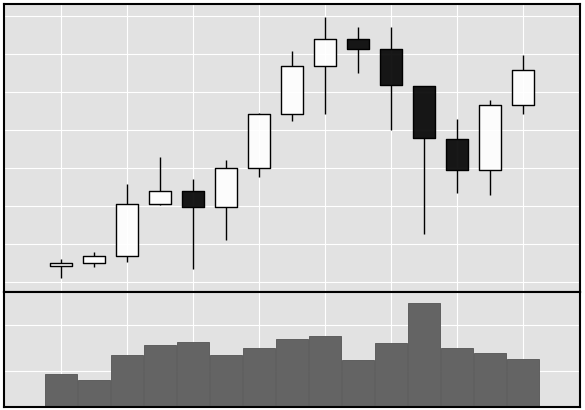

In [7]:
# Example
buf = io.BytesIO()
fplt.plot(df.iloc[0:15],type='candle',volume=True, savefig=buf)
buf.seek(0)
gray = ImageOps.grayscale(Image.open(buf))
w, h = gray.size
cropped = gray.crop((140, 65, w-75, h-100))
cropped

In [ ]:
# !mkdir train
# !mkdir train/positive
# !mkdir trian/negative

In [ ]:
for index in range(9, len(df), 10):
    try:
        buf = io.BytesIO()
        fplt.plot(df.iloc[index-9:index+1],type='candle',volume=True,savefig=buf)
        buf.seek(0)
        gray = ImageOps.grayscale(Image.open(buf))
        w, h = gray.size
        cropped = gray.crop((140, 65, w-75, h-100))
        start_date_string = str(df.index[index-9]).split(" ")[0].replace("-", "_") 
        end_date_string = str(df.index[index]).split(" ")[0].replace("-", "_")
        name = start_date_string + "-" + end_date_string + ".png"
        if (df.iloc[index+1].Open - df.iloc[index].Open)/df.iloc[index].Open > 0.05:
            cropped.save(f"train/positive/{name}")
        else:
            cropped.save(f"train/negative/{name}")
    except:
        print("Limit exceeded")